# <center> Machine Learning Applied to Weather Forecasting </center>

# Modélisation

Après avoir terminé la phase de la préparation des données, nous allons entamer la phase de modélisation. Nous allons commncer par un modèle de regression linéaire.

###### 1. upload prepared data : 

In [68]:
import pandas as pd
df=pd.read_csv('data/data-prepared.csv').set_index('date')
df.head()

,meantempm,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,meanpressurem_1,...,mindewptm_3,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3
date,,,,,,,,,,,,,,,,,,,,,
2015-01-04,-14,-12,-18,-4.0,-6.0,-6.0,-11.0,-9.0,-12.0,1016.0,...,-18.0,1025.0,1026.0,1025.0,1010.0,1017.0,1019.0,0.76,0.00,0.00
2015-01-05,-9,-3,-14,-14.0,-4.0,-6.0,-19.0,-11.0,-9.0,1033.0,...,-13.0,1043.0,1025.0,1026.0,1023.0,1010.0,1017.0,0.25,0.76,0.00
2015-01-06,-10,-6,-14,-9.0,-14.0,-4.0,-14.0,-19.0,-11.0,1032.0,...,-16.0,1043.0,1043.0,1025.0,1023.0,1023.0,1010.0,0.00,0.25,0.76
2015-01-07,-16,-12,-19,-10.0,-9.0,-14.0,-15.0,-14.0,-19.0,1036.0,...,-23.0,1043.0,1043.0,1043.0,1027.0,1023.0,1023.0,0.00,0.00,0.25
2015-01-08,-7,2,-16,-16.0,-10.0,-9.0,-22.0,-15.0,-14.0,1035.0,...,-17.0,1055.0,1043.0,1043.0,956.0,1027.0,1023.0,0.00,0.00,0.00


######   La régression linéaire utilisant les moindres carrés ordinaires :

<b>La régression linéaire</b> vise à appliquer un ensemble d'hypothèses primaires concernant les relations linéaires et les techniques numériques pour prédire une variable cible (la variable dépendante Y; the target) basé sur un ou plusieurs prédicteurs (variables indépendantes X; the features). L'objectif final est d'établir un modèle mathématique pour prédire la valeur de Y -avec une certaine quantité d'incertitude- étant donné seulement les valeurs prédictives X.

La formule générale de la régression linéaire  est la suivante :  

<mark>$$ \hat{y}=\beta_0 + \beta_1 * x_1 + \beta_2 * x_2 + \beta_3 * x_3 + ... + \beta_n * x_n + \epsilon  $$</mark>

-  <b>ŷ</b> : la variables cible
- <b>x_j</b> :  les variables indépendantes
- <b>β0</b> :   l'ordonnée à l'origine ou la valeur de  quand chaque xj est égal à zéro
- <b>βj</b>:  le changement de ŷ basé sur un changement d'une unité dans l'un des xj correspondant
- <b>ϵ</b>  :   un terme d'erreur aléatoire associé à la différence entre la valeur ŷi prédite et la valeur yi réelle

Le dernier terme de l'équation ci-dessus (<b>ϵ</b>) est le terme le plus important dans la régression linéaire. La forme la plus élémentaire pour faire un modèle de régression linéaire repose sur un algorithme connu sous le nom de Moindres carrés ordinaires qui trouve la combinaison des valeurs de <b>βj</b> qui minimisent le terme <b>ϵ</b>.

###### 3. Sélection des variables pour notre modèle :  

Une hypothèse clé requise par la régression linéaire est que nous avions une relation linéaire entre la variable dépendante et chaque variable indépendante. Nous allons utiliser comme méthode pour évaluer la linéarité entre notre variable indépendante (la température moyenne) et les autres variables indépendantes  <b>le coefficient de corrélation de Pearson.</b>

Le coefficient de corrélation de Pearson  est une mesure de la quantité de corrélation linéaire entre deux variables de même longueur qui produit une valeur allant de -1 à 1. Les valeurs de corrélation allant de 0 à 1 représentent une corrélation positive de plus en plus forte. Cela veut dire  que deux variables  sont positivement corrélées lorsque les valeurs d'une variable  augmentent simultanément avec les valeurs de l'autre variable et, comme elles augmentent toutes les deux dans une grandeur de plus en plus égale, la valeur de corrélation de Pearson approchera 1.

 Les valeurs de corrélation allant de 0 à -1 représentent une corrélation négative de plus en plus forte. Cela veut dire  que deux variables  sont négativement corrélées lorsque les valeurs d'une variable  augmentent, les valeurs de l'autre variable diminuent.

Les opinions varient selon les statisticiens et les livres de statistiques sur des limites bien définies pour les niveaux de force d'un coefficient de corrélation. Cependant, j'ai trouvé  dans un article (http://stackabuse.com/using-machine-learning-to-predict-the-weather-part-2/) qu'un ensemble de classifications généralement accepté pour les forces de corrélation sont les suivantes: 

In [69]:
from IPython.display import HTML, display
import tabulate
table=[["Correlation Value ","Interpretation"],
       ["0.8 - 1.0", "Very Strong"],
["0.6 - 0.8","Strong" ],
       ["0.4 - 0.6","Moderate"],
["0.2 - 0.4" ,"Weak"],
["0.0 - 0.2", "Very Weak" ]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Correlation Value,Interpretation
0.8 - 1.0,Very Strong
0.6 - 0.8,Strong
0.4 - 0.6,Moderate
0.2 - 0.4,Weak
0.0 - 0.2,Very Weak


<i>pour les valeurs de 0 à -1 on aura les mêmes intérprétation.</i> 

In [70]:
#corrélation en utilisant la fonction corr()
correlation = df.corr()[['meantempm']].sort_values('meantempm')  
correlation

,meantempm
maxpressurem_1,-0.531878
maxpressurem_2,-0.432725
maxpressurem_3,-0.419222
meanpressurem_1,-0.382562
meanpressurem_2,-0.281606
meanpressurem_3,-0.278107
minpressurem_1,-0.220759
minhumidity_1,-0.135587
minhumidity_2,-0.127900
minpressurem_2,-0.120854


Nous allons inclure que les variables dont le coefficient de corrélation est supérieur à 0.6 en valeur absolue. De plus, nous allons aussi éliminer maxtemp et mintemp puisque ces deux variables seront l'origine d'une <b>Data leakage</b> (Elle a lieu quand on dispose dans l'ensemble des features un ou plusieurs features qui sont très suffisants pour la prédiction de la variable cible.)

In [71]:
predictors = list(correlation[(correlation['meantempm']>0.6) | (correlation['meantempm']<-0.6)].index)

In [72]:
predictors.remove('maxtempm')
predictors.remove('mintempm')
predictors.remove('meantempm')

In [73]:
df2=df[predictors+['meantempm']]

##### 4. Visualisation des relations linéaires entre la cibles et les features : 

In [74]:
import matplotlib  
import matplotlib.pyplot as plt  
import numpy as np  

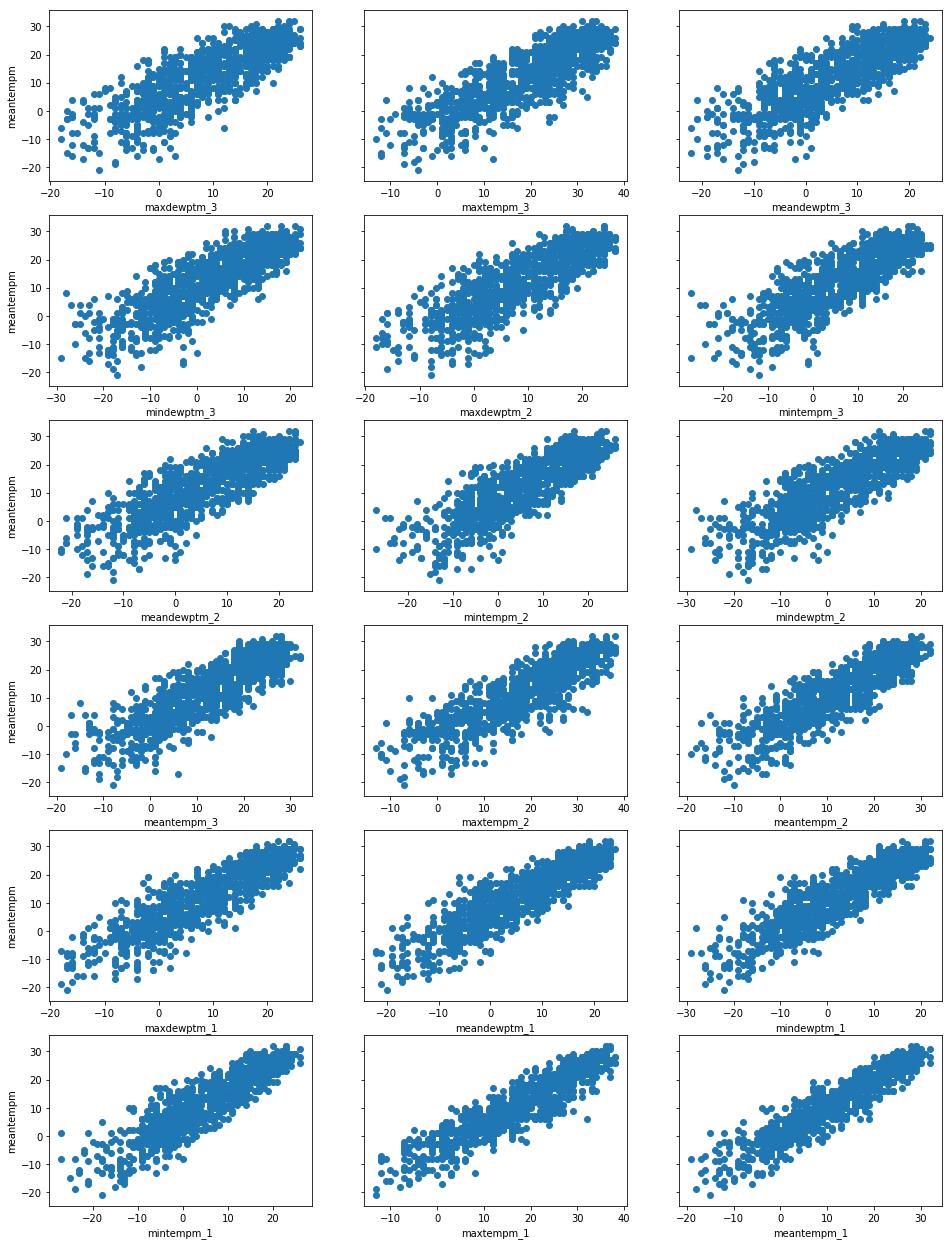

In [75]:
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [16, 22]

# call subplots specifying the grid structure we desire and that 
# the y axes should be shared
fig, axes = plt.subplots(nrows=6, ncols=3, sharey=True)

# Since it would be nice to loop through the features in to build this plot
# let us rearrange our data into a 2D array of 6 rows and 3 columns
arr = np.array(predictors).reshape(6, 3)

# use enumerate to loop over the arr 2D array of rows and columns
# and create scatter plots of each meantempm vs each feature
for row, col_arr in enumerate(arr):  
    for col, feature in enumerate(col_arr):
        axes[row, col].scatter(df2[feature], df2['meantempm'])
        if col == 0:
            axes[row, col].set(xlabel=feature, ylabel='meantempm')
        else:
            axes[row, col].set(xlabel=feature)
            
plt.show()  


à partir des graphiques ci-dessus nous remarquons très bien que toutes les variables restantes présentent une relation linéaire avec la variable cible (meantempm).

De plus, il est également intéressant de noter que les relations sont uniformément distribuées de manière aléatoire. J'entends par là qu'il semble y avoir une variation relativement égale dans la propagation des valeurs dépourvues de toute forme d'éventail ou de cône. Une distribution aléatoire uniforme de la propagation le long des points est également une autre hypothèse importante de la régression linéaire utilisant l'algorithme des moindres carrés ordinaires.

###### 5. Step-Wise Regression : 

Un modèle de régression linéaire robuste devrait utiliser des tests statistiques pour sélectionner des prédicteurs significatifs, statistiquement significatifs, à inclure. Pour sélectionner des features statistiquement significatives, j'utiliserai la bibliothèque Python statsmodels. Cependant, avant de passer à l'implémentation pratique de l'utilisation de la bibliothèque statsmodels, je voudrais prendre du recul et expliquer la signification théorique et le but de cette approche.

Un aspect clé de l'utilisation de méthodes statistiques telles que la régression linéaire dans un projet d'analyse est les tests d'hypothèses pour valider la signification des hypothèses faites sur les données étudiées. De nombreux tests d'hypothèses ont été développés pour tester la robustesse d'un modèle de régression linéaire par rapport à diverses hypothèses. Un tel test d'hypothèse consiste à évaluer la signification de chacune des variables prédictives incluses.

Rappel :  la formule mathématiquede la régression linéaire 

$$ \hat{y}=\beta_0 + \beta_1 * x_1 + \beta_2 * x_2 + \beta_3 * x_3 + ... + \beta_n * x_n + \epsilon  $$

La définition formelle du test d'hypothèse pour la signification des paramètres <b>βj</B> est la suivante:

- H0 : <b>βj</b> = 0, l'hypothèse nulle indique que le prédicteur n'a aucun effet sur la variable cible.

- H1 :  <b>βj</b> # 0, l'hypothèse alternative indique que le prédicteur a un effet significatif sur la variable cible.

En utilisant des tests de probabilité pour évaluer la probabilité que chaque <b>βj</b> est significatif au-delà de la simple chance aléatoire à un seuil sélectionné <b>threshold</b> nous pouvons être plus rigoureux dans la sélection des variables à inclure résultant en un modèle plus robuste.

Cependant, dans de nombreux jeux de données, il peut y avoir des interactions entre les variables qui peuvent conduire à de fausses interprétations de ces tests d'hypothèse simples. Pour tester les effets des interactions sur la signification de n'importe quelle variable dans un modèle de régression linéaire, une technique connue sous le nom <b>Step-Wise Regressionn</b> est souvent appliquée. En utilisant cette régression, nous ajoutons ou supprimons des variables du modèle et évaluer la signification statistique de chaque variable sur le modèle résultant.

Pour ce faire, nous allons utiliser la méthode connue sous le nom : <b>Backward elimination</b>

###### 6. Backward elimination :  formalisation 

 <b>a.</b> Sélectionner un niveau de signification <b>threshold</b> pour lequel nous allons tester notre hypothèse afin de déterminer si une variable doit rester dans le modèle
 
 <b>b.</b> élaborer le modéle avec toutes les variables choisies
 
 <b>c</b>. Evaluer les p-values des <b>βj</b> et pour celui qui a la plus grande p-value, si p-value> <b>threshold</b> on passe à l'étape 4, sinon nous avons notre modèle final

 <b>d.</b> Supprimer la variable identifiée à l'étape 3
 
 <b>e.</b> Elaborer le modèle une deuxième fois mais ce fois-ci sans la variable supprimée dans l'étape 4 puis reboucler vers l'étape 3 .

###### 7. Modélisation 

In [76]:
# import the relevant module
import statsmodels.api as sm

# separate our my predictor variables (X) from my outcome variable y
X = df2[predictors]  
y = df2['meantempm']

# Add a constant to the predictor variable set to represent the Bo intercept
X = sm.add_constant(X)  

In [77]:
# (1) select a significance value
alpha = 0.05

# (2) Fit the model
model = sm.OLS(y, X).fit()

# (3) evaluate the coefficients' p-values
model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              meantempm   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     499.7
Date:                Mon, 09 Apr 2018   Prob (F-statistic):               0.00
Time:                        15:44:05   Log-Likelihood:                -2948.6
No. Observations:                1093   AIC:                             5935.
Df Residuals:                    1074   BIC:                             6030.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.9970      0.504      1.979      0.048       0.009       1.985
maxdewptm_3      0.0433      0.083      0.521      0.602      -0.120       0.206
maxtempm_3       0.0659      0.142      0.463      0.643      -0.213       0.345
meandewptm_3     0.0415      0.128      0.325      0.745      -0.209       0.292
mindewptm_3     -0.0305      0.080     -0.382      0.702      -0.187       0.126
maxdewptm_2      0.0418      0.085      0.492      0.623      -0.125       0.208
mintempm_3       0.1375      0.144      0.952      0.341      -0.146       0.421
meandewptm_2    -0.0878      0.129     -0.682      0.495      -0.340       0.165
mintempm_2      -0.2760      0.145     -1.897      0.058      -0.562       0.009
mindewptm_2      0.0266      0.082      0.323      0.747      -0.135       0.188
meantempm_3     -0.0280      0.279     -0.101      0.920      -0.575       0.519
maxtempm_2      -0.2833      0.143     -1.979      0.048      -0.564      -0.002
meantempm_2      0.4543      0.279      1.626      0.104      -0.094       1.002
maxdewptm_1     -0.2238      0.085     -2.638      0.008      -0.390      -0.057
meandewptm_1     0.0963      0.128      0.750      0.453      -0.156       0.348
mindewptm_1      0.3052      0.079      3.885      0.000       0.151       0.459
mintempm_1       0.0440      0.145      0.303      0.762      -0.241       0.329
maxtempm_1       0.5118      0.142      3.597      0.000       0.233       0.791
meantempm_1      0.1043      0.279      0.373      0.709      -0.444       0.653
==============================================================================
Omnibus:                        9.768   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               12.407
Skew:                          -0.111   Prob(JB):                      0.00202
Kurtosis:                       3.472   Cond. No.                         281.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# (3) cont. - Identify the predictor with the greatest p-value and assess if its > our selected alpha.
#             based off the table it is clear that meantempm_3 has the greatest p-value and that it is
#             greater than our alpha of 0.05

# (4) - Use pandas drop function to remove this column from X
X = X.drop('meantempm_3', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              meantempm   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     529.5
Date:                Mon, 09 Apr 2018   Prob (F-statistic):               0.00
Time:                        15:44:08   Log-Likelihood:                -2948.6
No. Observations:                1093   AIC:                             5933.
Df Residuals:                    1075   BIC:                             6023.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.9926      0.502      1.979      0.048       0.008       1.977
maxdewptm_3      0.0431      0.083      0.519      0.604      -0.120       0.206
maxtempm_3       0.0519      0.031      1.701      0.089      -0.008       0.112
meandewptm_3     0.0416      0.128      0.326      0.745      -0.209       0.292
mindewptm_3     -0.0309      0.080     -0.387      0.699      -0.188       0.126
maxdewptm_2      0.0420      0.085      0.495      0.621      -0.124       0.208
mintempm_3       0.1239      0.051      2.406      0.016       0.023       0.225
meandewptm_2    -0.0877      0.129     -0.682      0.495      -0.340       0.165
mintempm_2      -0.2753      0.145     -1.895      0.058      -0.560       0.010
mindewptm_2      0.0268      0.082      0.325      0.745      -0.135       0.188
maxtempm_2      -0.2825      0.143     -1.977      0.048      -0.563      -0.002
meantempm_2      0.4526      0.279      1.624      0.105      -0.094       0.999
maxdewptm_1     -0.2239      0.085     -2.640      0.008      -0.390      -0.058
meandewptm_1     0.0964      0.128      0.751      0.453      -0.155       0.348
mindewptm_1      0.3052      0.079      3.886      0.000       0.151       0.459
mintempm_1       0.0442      0.145      0.305      0.761      -0.240       0.329
maxtempm_1       0.5121      0.142      3.601      0.000       0.233       0.791
meantempm_1      0.1037      0.279      0.372      0.710      -0.444       0.652
==============================================================================
Omnibus:                        9.745   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               12.362
Skew:                          -0.111   Prob(JB):                      0.00207
Kurtosis:                       3.471   Cond. No.                         269.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nous allons maintenant écrire une fonction qui permet de faire le reste du travail d'une façon automatique :

In [79]:
def step_OLS(model,X,y):
    #feature with the greatest p-value : 
    while (model.pvalues.max()>alpha) :
        feature = model.pvalues.idxmax()
        X = X.drop(feature, axis=1)
        model = sm.OLS(y, X).fit()
    return (model,X,y)

In [80]:
res= step_OLS(model,X,y)

In [82]:
res[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              meantempm   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     1497.
Date:                Mon, 09 Apr 2018   Prob (F-statistic):               0.00
Time:                        15:44:49   Log-Likelihood:                -2954.6
No. Observations:                1093   AIC:                             5923.
Df Residuals:                    1086   BIC:                             5958.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.3245      0.433      3.057      0.002       0.474       2.175
maxtempm_3      0.0644      0.028      2.320      0.021       0.010       0.119
mintempm_3      0.1364      0.026      5.219      0.000       0.085       0.188
maxtempm_2     -0.0719      0.029     -2.509      0.012      -0.128      -0.016
maxdewptm_1    -0.1782      0.043     -4.193      0.000      -0.262      -0.095
mindewptm_1     0.3983      0.037     10.777      0.000       0.326       0.471
maxtempm_1      0.5852      0.026     22.733      0.000       0.535       0.636
==============================================================================
Omnibus:                        8.977   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               11.393
Skew:                          -0.099   Prob(JB):                      0.00336
Kurtosis:                       3.459   Cond. No.                         166.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nous pouvons voir à partir de la sortie que tous les prédicteurs restants ont une p-value nettement inférieure à notre <b>threshold</b> de 0,05. Une autre chose mérittant notre attention est les valeurs R-squared dans la sortie finale. Deux choses à noter ici sont : 
- 1  R-squared et Adj. R-squared sont toutes les deux égales, ce qui suggère qu'il n'y aura pas d'overfitting dans  notre modèle suit à l'ajout de d'autres variables.
- 2  la valeur de 0,892 est interprétée de telle sorte que notre modèle final explique environ 90% de la variance de notre variable cible "meanempm".

###### Conclusion : 

In [84]:
X=res[1]
y=res[2]

Les variables explicatives qui sont importantes statistiquement pour prédire la température moyenne sont :  

In [87]:
print(list(X.columns))

['const', 'maxtempm_3', 'mintempm_3', 'maxtempm_2', 'maxdewptm_1', 'mindewptm_1', 'maxtempm_1']


# SciKit Learn : La régression linéaire 

Après avoir déterminé les variables qui statistiquement significatifs, nous allons maintenanant utiliser Scikit-learn pour prédire la température moyenne.

###### split data train/test : 

In [88]:
from sklearn.model_selection import train_test_split  
# first remove the const column because unlike statsmodels, SciKit-Learn will add that in for us
X = X.drop('const', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)  

###### Train model/ test model : 

In [89]:
from sklearn.linear_model import LinearRegression  
# instantiate the regressor class
regressor = LinearRegression()

# fit the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

# make a prediction set using the test set
prediction = regressor.predict(X_test)

# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, median_absolute_error  
print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))  
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, prediction))  
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, prediction))  

The Explained Variance: 0.89
The Mean Absolute Error: 2.97 degrees celsius
The Median Absolute Error: 2.47 degrees celsius


Pour avoir une compréhension interprétative de la validité de notre modèle, j'ai utilisé la fonction <i> score() </i>, cela nous permet d'avoir une variance expliquée d'environ 90%. De plus, l'utilisation de mean_absolute_error() et median_absolute_error() du module sklearn.metrics nous permet de déterminer que l'erreur de prédiction est en moyenne d'environ 3 degrés Celsius et la moitié du temps d'environ 2 degrés Celsius.

# Conclusion : 

Nous avons bien réussi à établir un modèle de regréssion linéaire qui très bon dans le mesure où il explique une variance totale de 90% du jeu de données. L'anlayse nous a permet de conclure quant à la dépendance de la température avec certaine variables climatiques et leurs historiques temporels.